In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel(r'/Users/kkubiak/Downloads/gun_violence_data_2013_2018.xlsx', 'Arkusz2')

df2 = df.groupby(['state'], as_index=False)['n_killed'].sum()
df2 = pd.DataFrame(df2)
df2 = df2.rename(columns={"n_killed": "murders_total"})

df2.query('murders_total == murders_total.max()')   

,state,murders_total
4,California,5562


,incident_id,date,state,city_or_county,address,n_killed,n_injured,latitude,longitude
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,40.3467,-79.8559
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,33.9090,-118.3330
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,41.4455,-82.1377
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,39.6518,-104.8020
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,36.1140,-79.9569
...,...,...,...,...,...,...,...,...,...
239672,1083142,2018-03-31,Louisiana,Rayne,North Riceland Road and Highway 90,0,0,NaN,NaN
239673,1083139,2018-03-31,Louisiana,Natchitoches,247 Keyser Ave,1,0,31.7537,-93.0836
239674,1083151,2018-03-31,Louisiana,Gretna,1300 block of Cook Street,0,1,29.9239,-90.0442
239675,1082514,2018-03-31,Texas,Houston,12630 Ashford Point Dr,1,0,29.7201,-95.6110


In [3]:
populations = [4891628, 736624, 7164228, 3012161, 39437463, 5697155, 3574561, 966985, 704147, 21254926, 10519389, 1423102, 1752074, 12724685, 6698481, 3149900, 2912748, 4464273, 4664450, 1340123, 6042153, 6885720, 9987286, 5608762, 2982879, 6125986, 1061818, 1925512, 3030725, 1355064, 8891730, 2093754, 19544098, 10391358, 760062, 11680892, 3943488, 4183538, 12809107, 1059338, 5091702, 879386, 6778180, 28624564, 3155153, 624802, 8510920, 7526793, 1805953, 5809319, 579054]
df2['population'] = populations

In [4]:
df2['murder_rate'] = round(df2['murders_total']/df2['population']*100000, 1)
df2 = df2[['state', 'population', 'murders_total', 'murder_rate']]
df2

,state,population,murders_total,murder_rate
0,Alabama,4891628,1880,38.4
1,Alaska,736624,267,36.2
2,Arizona,7164228,1094,15.3
3,Arkansas,3012161,773,25.7
4,California,39437463,5562,14.1
5,Colorado,5697155,796,14.0
6,Connecticut,3574561,341,9.5
7,Delaware,966985,217,22.4
8,District of Columbia,704147,459,65.2
9,Florida,21254926,3909,18.4


In [5]:
df2_sort = df2.sort_values(by=['murder_rate'], ascending=True)
df2_sort

,state,population,murders_total,murder_rate
11,Hawaii,1423102,63,4.4
39,Rhode Island,1059338,63,5.9
29,New Hampshire,1355064,88,6.5
21,Massachusetts,6885720,472,6.9
23,Minnesota,5608762,461,8.2
19,Maine,1340123,112,8.4
32,New York,19544098,1705,8.7
15,Iowa,3149900,273,8.7
44,Utah,3155153,282,8.9
45,Vermont,624802,57,9.1


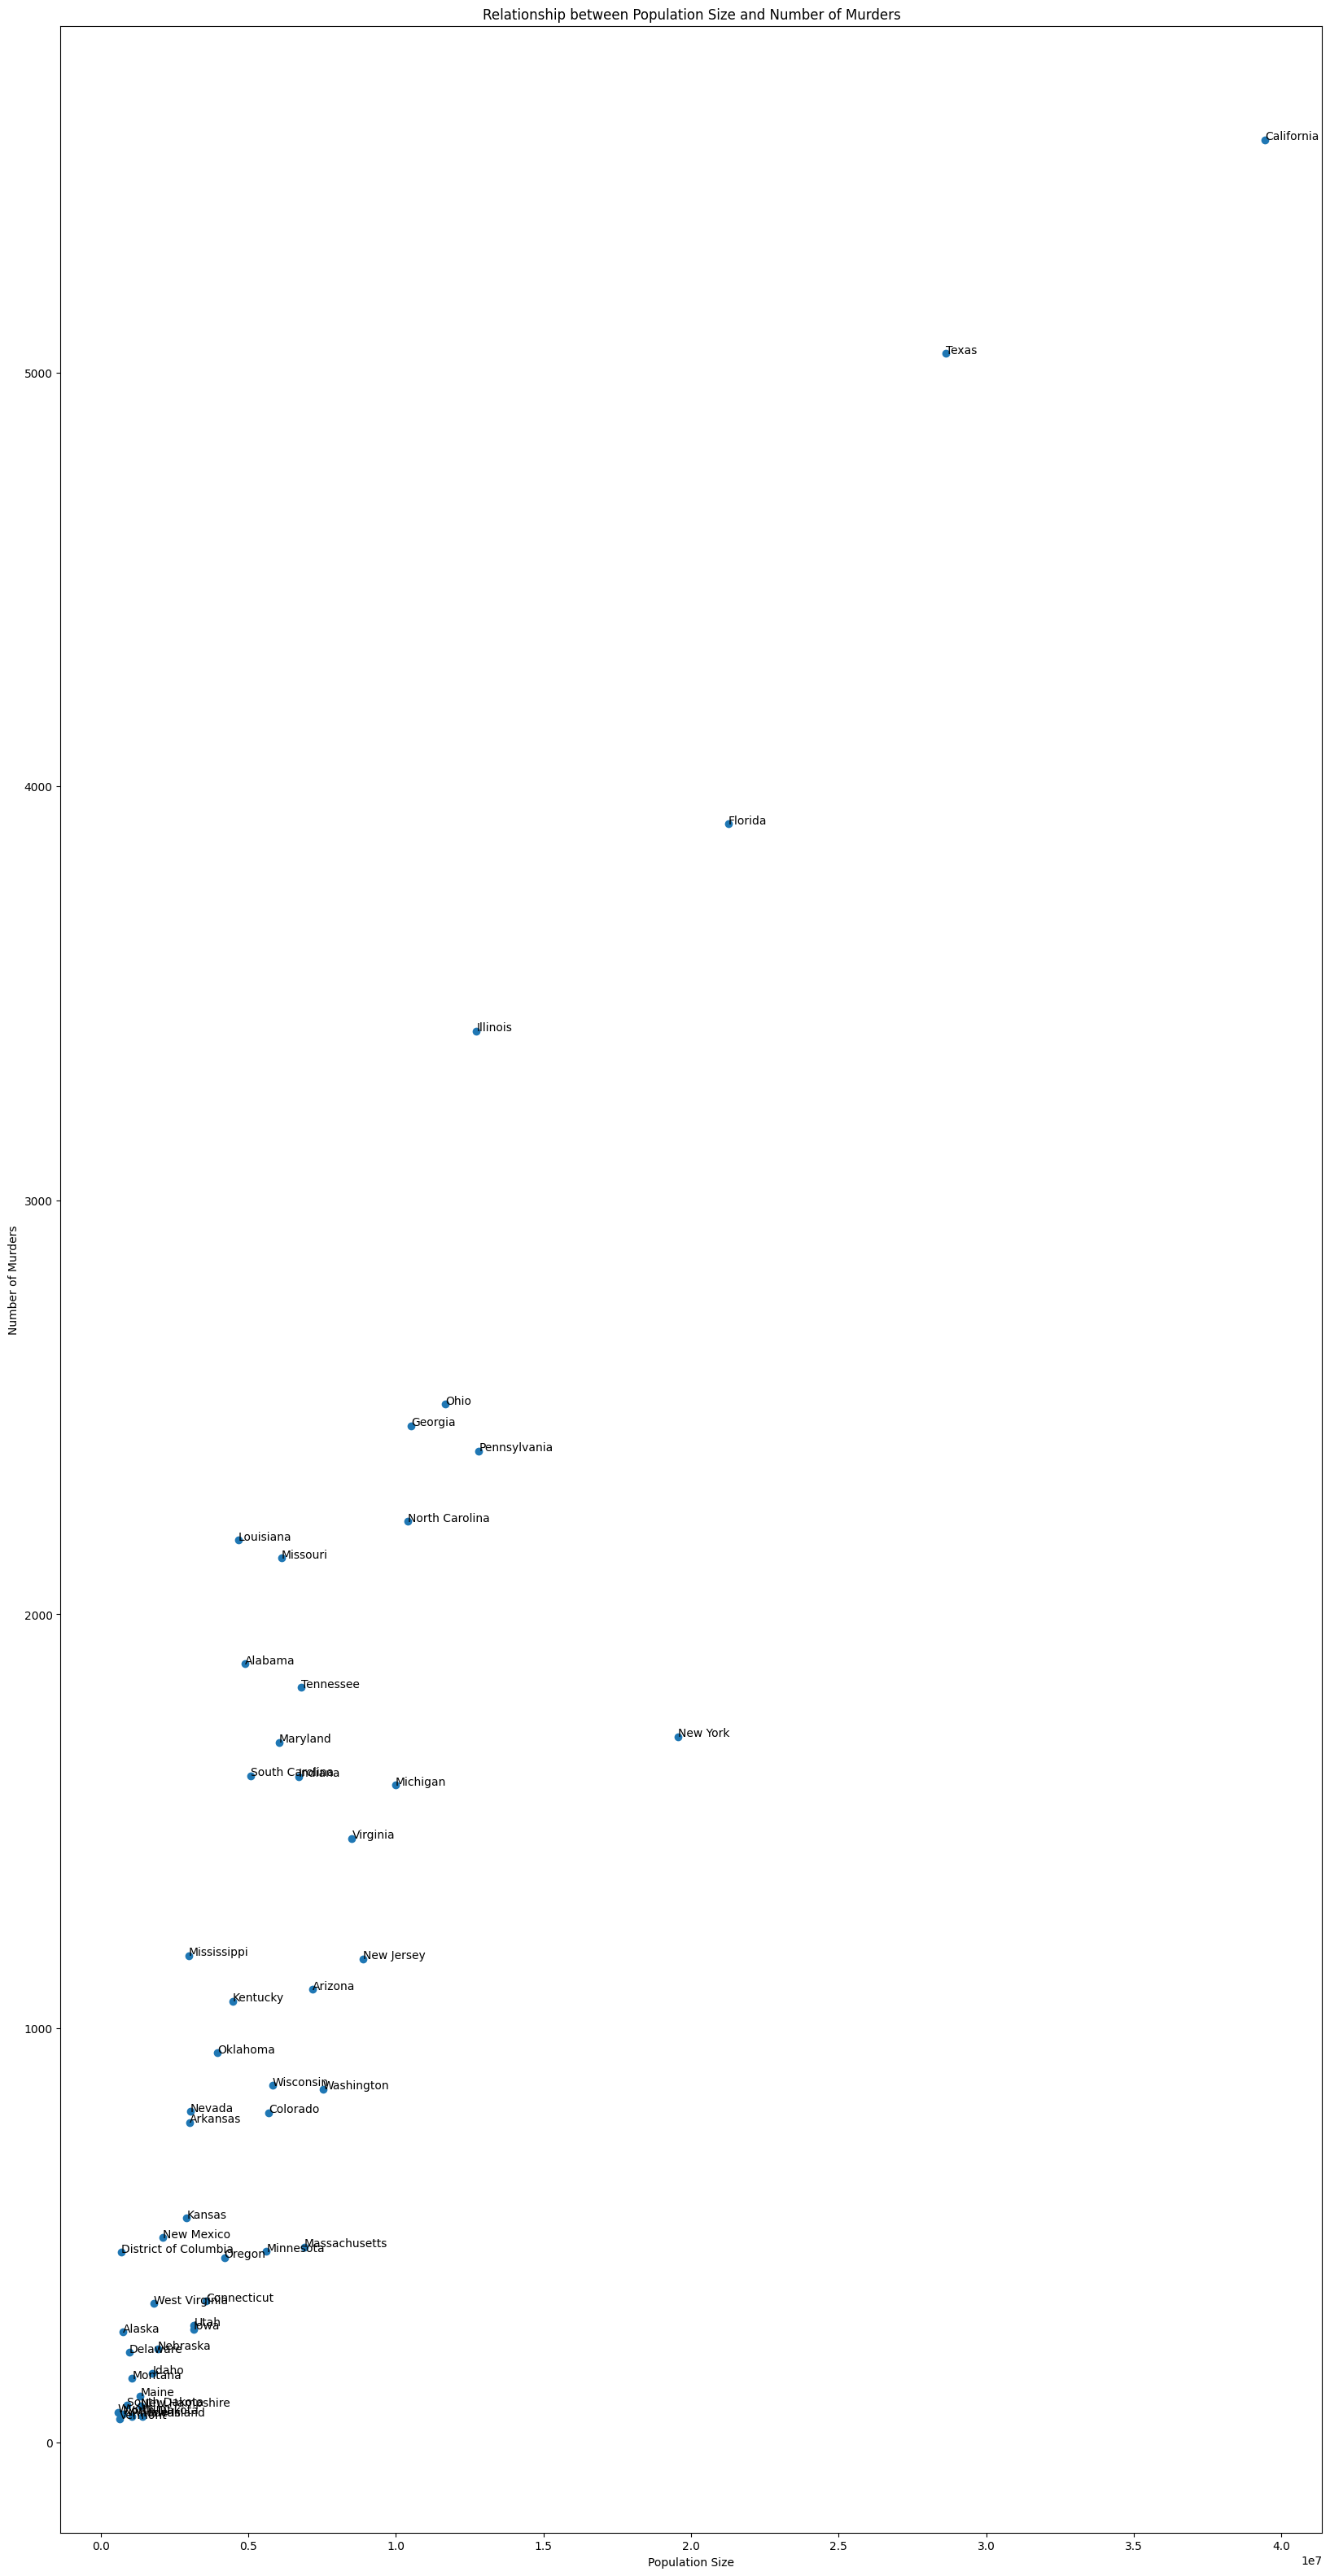

In [6]:
fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(40)
ax.scatter(df2['population'], df2['murders_total'])
plt.xlabel('Population Size')
plt.ylabel('Number of Murders')
plt.title('Relationship between Population Size and Number of Murders')
for i, txt in enumerate(df2['state']):
    ax.annotate(txt, (df2['population'][i], df2['murders_total'][i]))


Text(0.5, 1.0, 'State murder rates per capita')

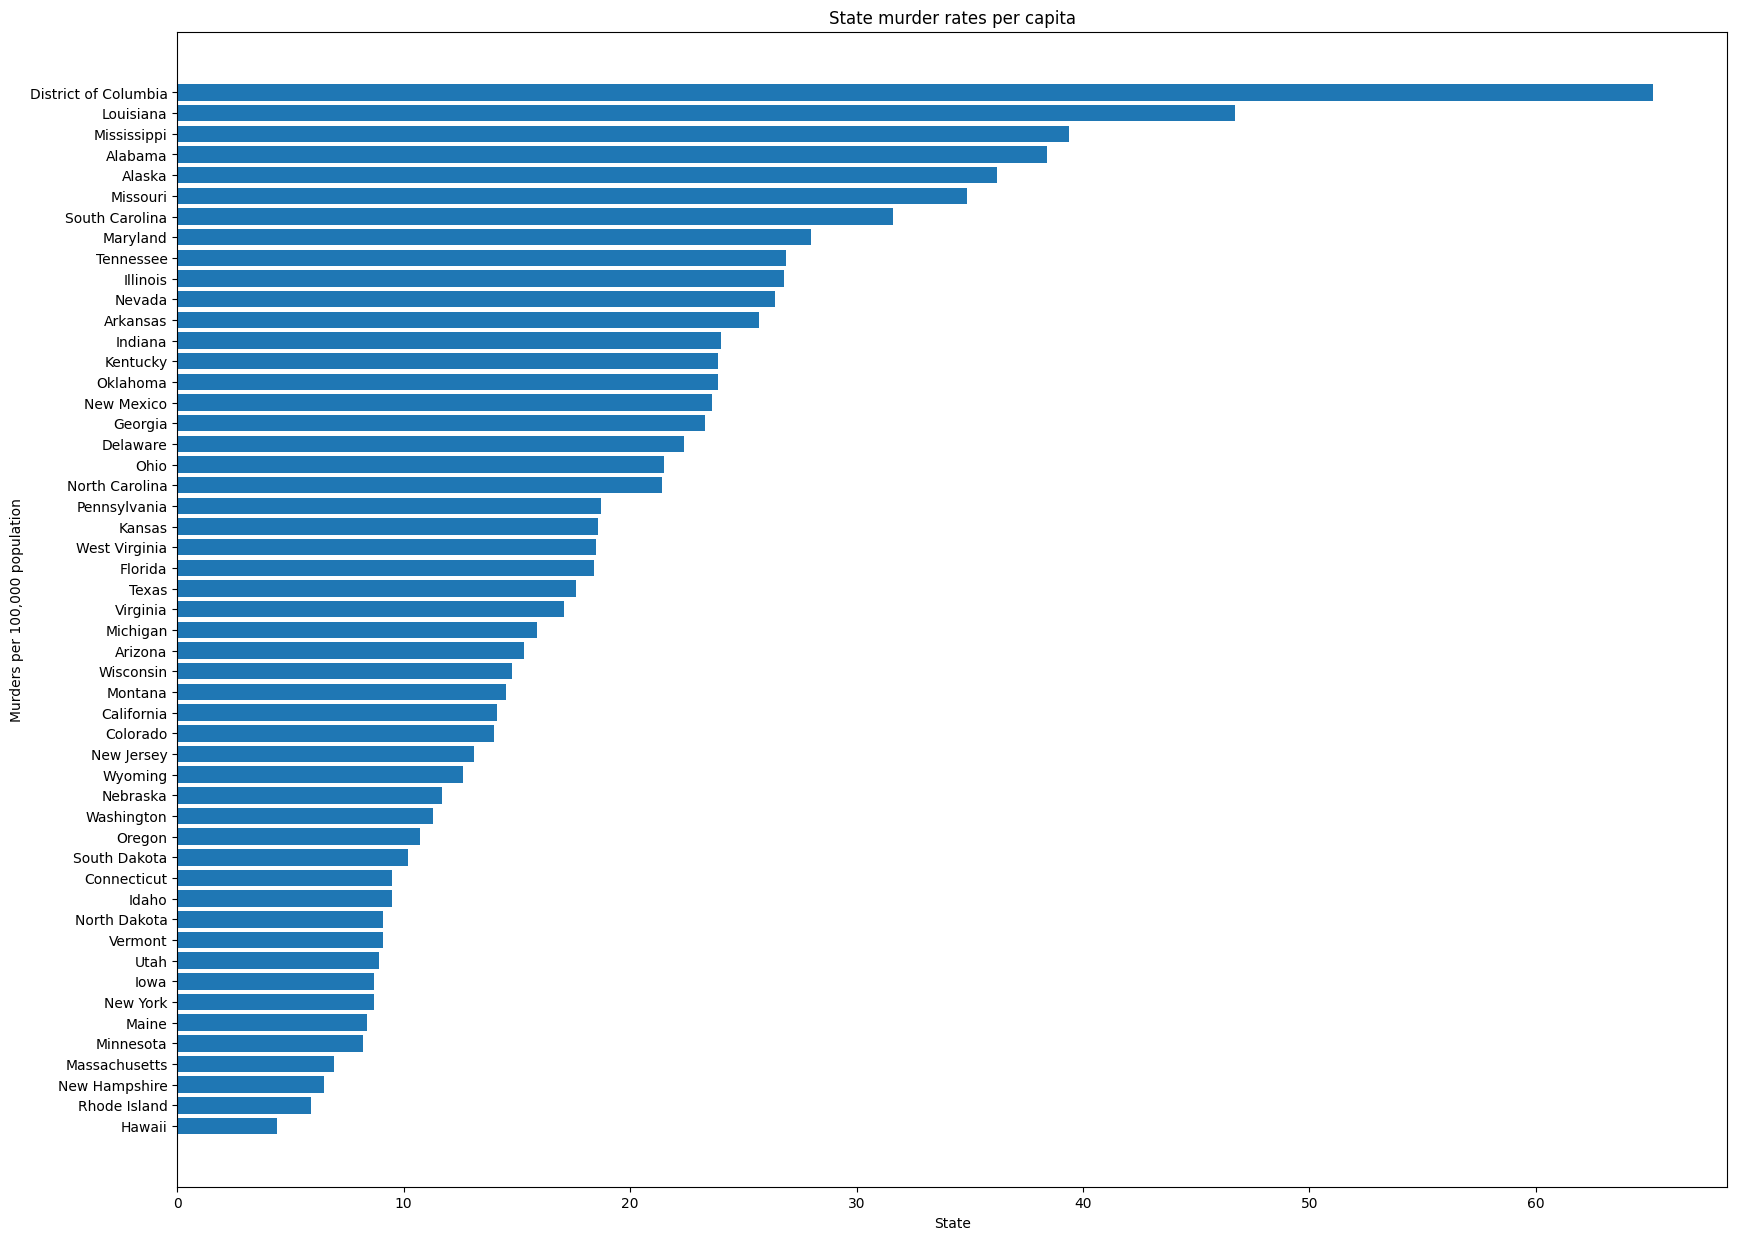

In [7]:
fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(15)
ax.barh(df2_sort['state'], df2_sort['murder_rate'])
plt.xlabel('State')
plt.ylabel('Murders per 100,000 population')
plt.title('State murder rates per capita')


In [8]:
df2.to_csv('lab1task2csv.csv', sep='\t', index=False)

In [ ]:
df_cords = pd.read_excel(r'/Users/kkubiak/Desktop/coords.xlsx', 'Sheet1')

In [ ]:
df2['latitude'] = df_cords['Latitude']
df2['longitude'] = df_cords['Longitude']

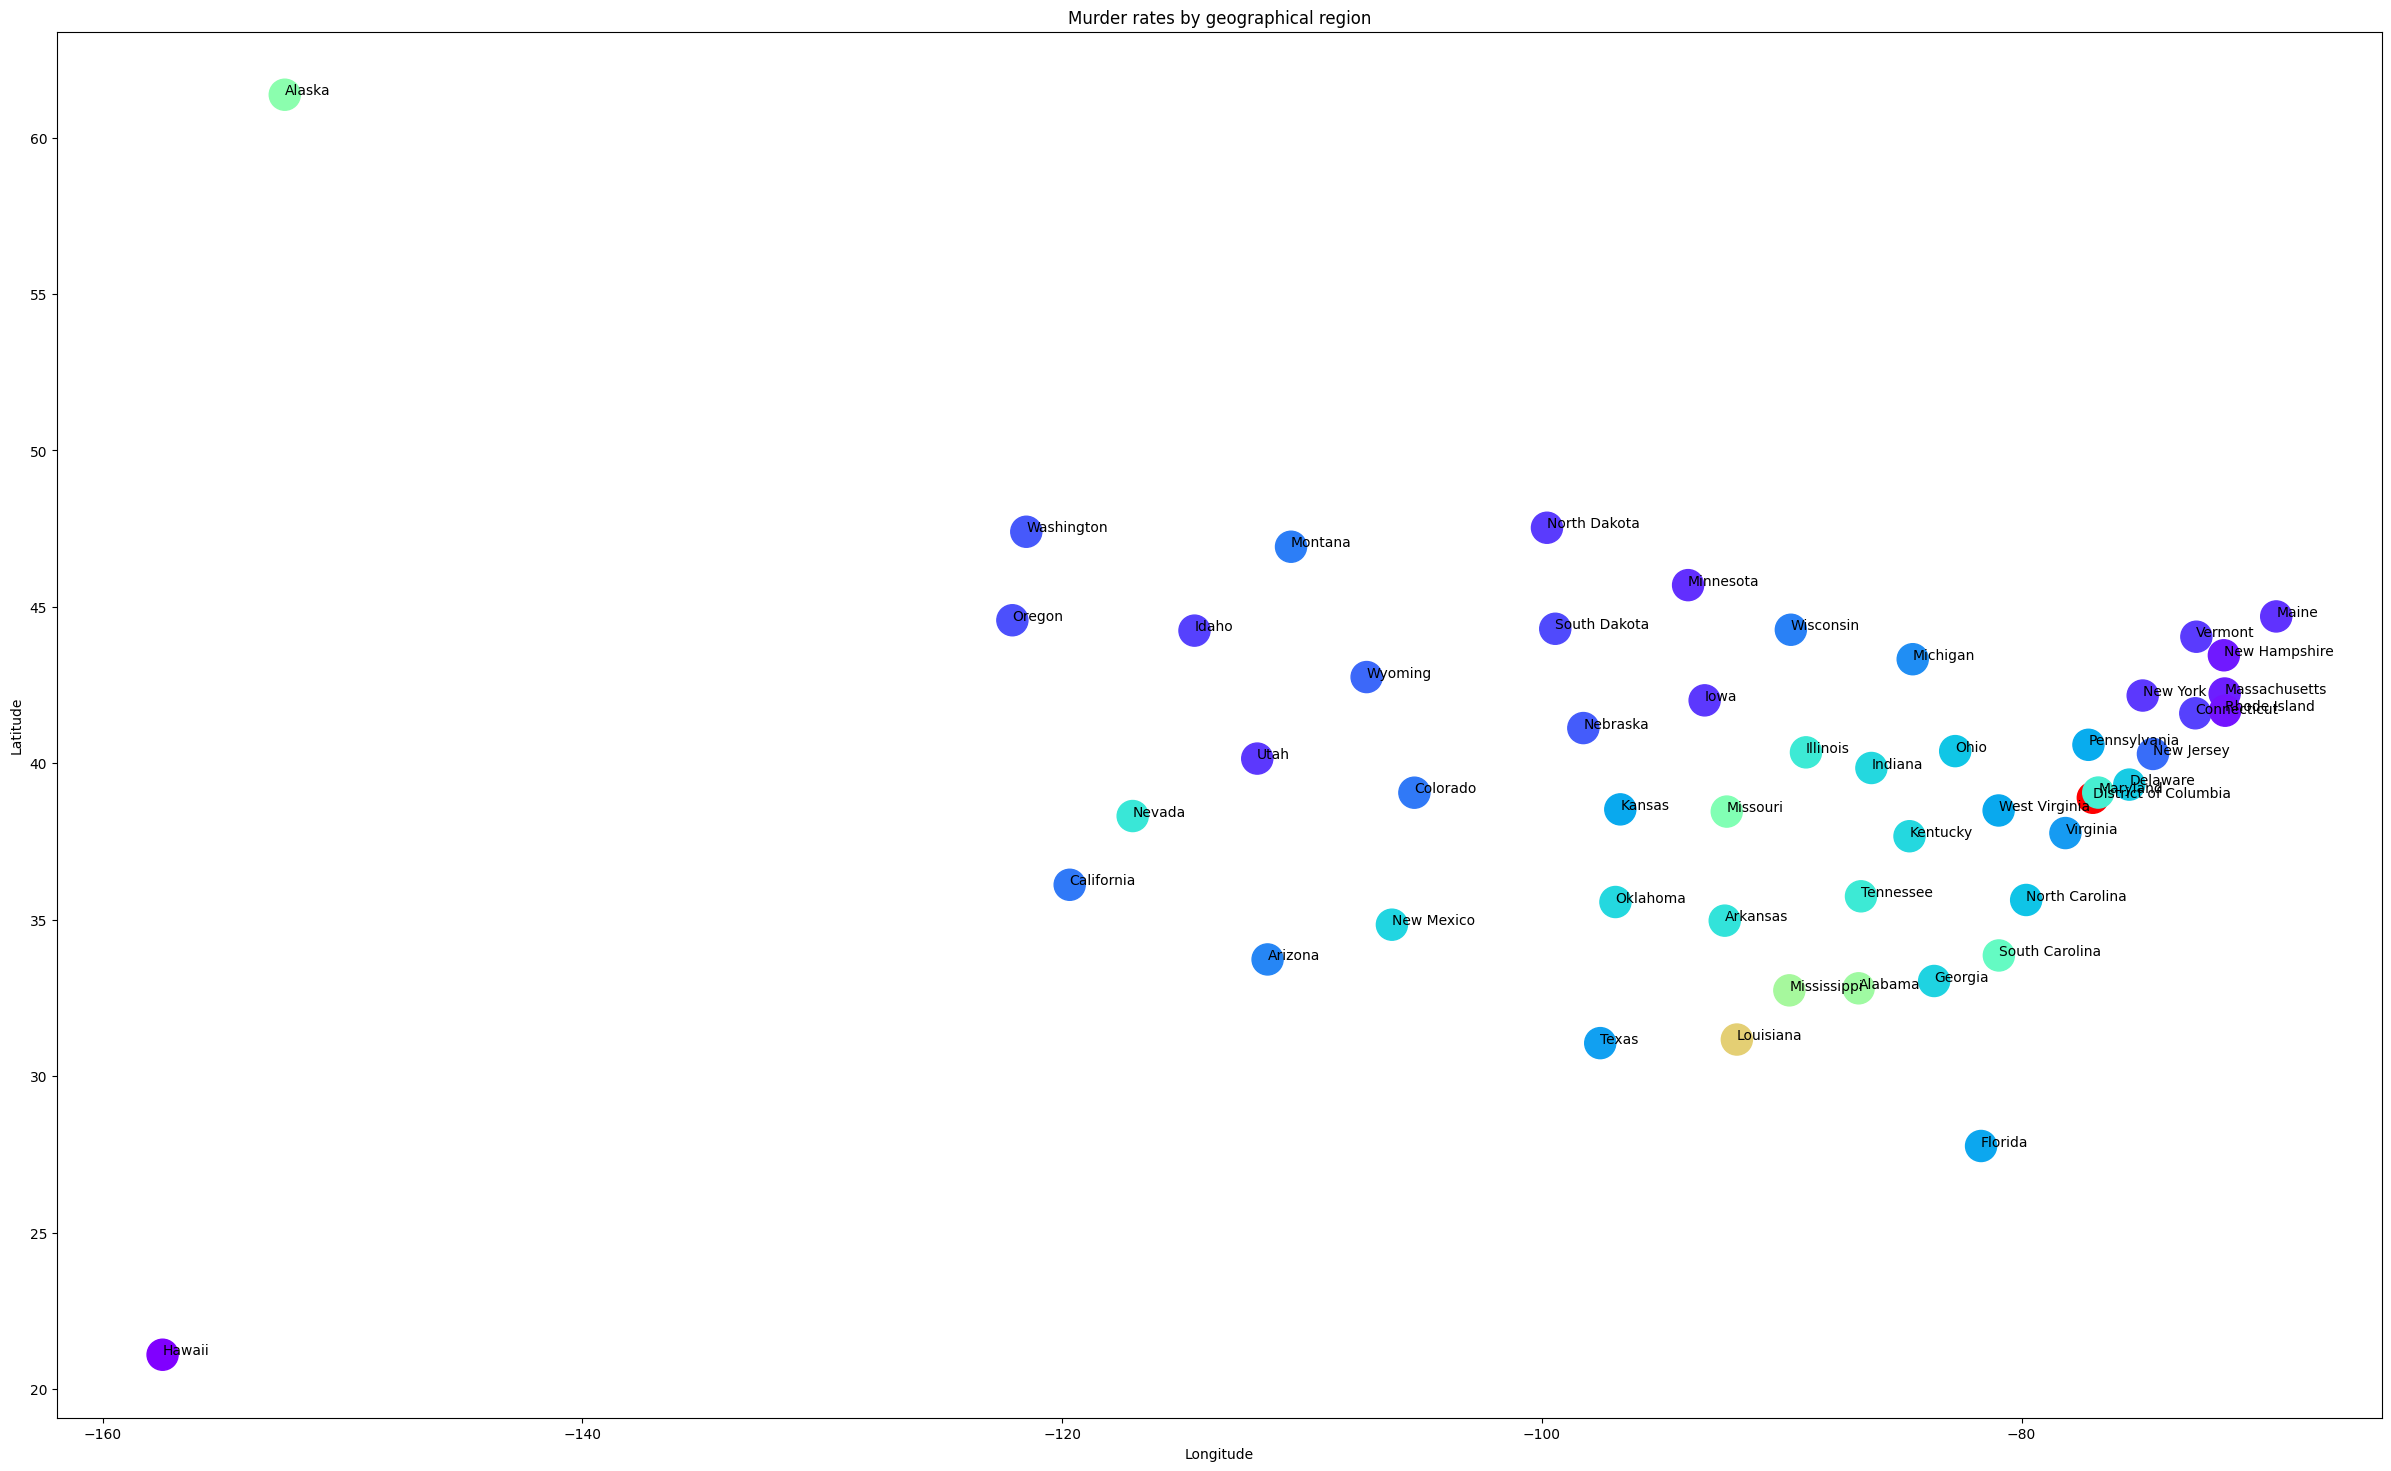

In [ ]:
fig, ax = plt.subplots()
fig.set_figwidth(30)
fig.set_figheight(18)
ax.scatter(df2['longitude'], df2['latitude'], s=500, c=df2['murder_rate'], cmap='rainbow')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Murder rates by geographical region')
for i, txt in enumerate(df2['state']):
    ax.annotate(txt, (df2['longitude'][i], df2['latitude'][i]))

In [11]:
df

,incident_id,date,state,city_or_county,address,n_killed,n_injured,latitude,longitude
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,40.3467,-79.8559
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,33.9090,-118.3330
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,41.4455,-82.1377
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,39.6518,-104.8020
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,36.1140,-79.9569
...,...,...,...,...,...,...,...,...,...
239672,1083142,2018-03-31,Louisiana,Rayne,North Riceland Road and Highway 90,0,0,NaN,NaN
239673,1083139,2018-03-31,Louisiana,Natchitoches,247 Keyser Ave,1,0,31.7537,-93.0836
239674,1083151,2018-03-31,Louisiana,Gretna,1300 block of Cook Street,0,1,29.9239,-90.0442
239675,1082514,2018-03-31,Texas,Houston,12630 Ashford Point Dr,1,0,29.7201,-95.6110


In [16]:
min_lat, max_lat = df['latitude'].min(), df['latitude'].max()

In [26]:
min_lat, max_lat
bars = 10
delta = (max_lat - min_lat)/10
latitudes = np.linspace(min_lat, max_lat, 10)


In [22]:

murders = []
for i in range(10):
    local_min = min_lat + i * delta
    local_max = local_min + delta
    df_range = df[(df['latitude'] >= local_min) & (df['latitude'] <= local_max)]
    murders.append(df_range['n_killed'].sum())


In [23]:
murders

[57, 3783, 17749, 20209, 13735, 1395, 5, 40, 192, 13]

<BarContainer object of 10 artists>

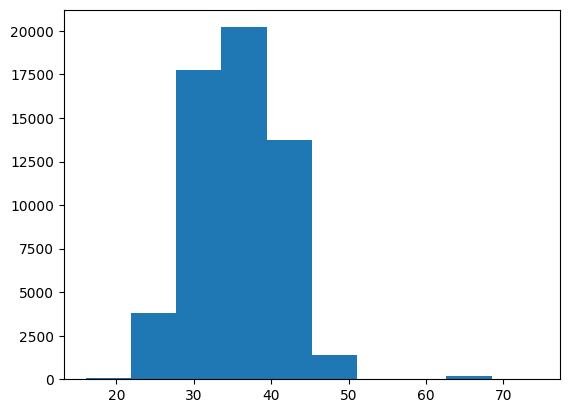

In [29]:
plt.bar(latitudes, murders, width=6)

In [30]:
all_murders = []
for index, row in df.iterrows():
    for i in range(row['n_killed']):
        all_murders.append(row['latitude'])

(array([5.7000e+01, 3.7830e+03, 1.7749e+04, 2.0209e+04, 1.3735e+04,
        1.3950e+03, 5.0000e+00, 4.0000e+01, 1.9200e+02, 1.3000e+01]),
 array([19.1114 , 24.33394, 29.55648, 34.77902, 40.00156, 45.2241 ,
        50.44664, 55.66918, 60.89172, 66.11426, 71.3368 ]),
 <BarContainer object of 10 artists>)

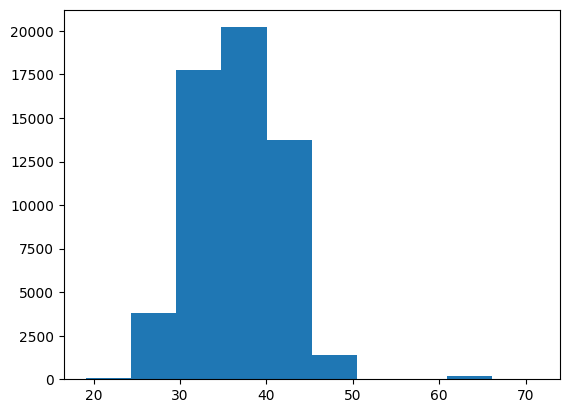

In [32]:
plt.hist(all_murders, bins=10)